# Dimensionality Reduction Methods

This notebook contains implementation of Principal component analysis and use of t-SNE on Iris and Swiss Roll Dataset.
In addition to that, all the observations and graphs are included.

In [2]:
# Libraries

%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
# Funciton to normalize data

def normalise(data):
    normalised_data = data;
    for i in range(data.shape[1]):
        _mean = np.mean(data[:,i])
        _variance = np.var(data[:,i])
        normalised_data[:,i] = (data[:,i]-_mean)/_variance
    
    return(normalised_data)

In [4]:
# Get n principal components using PCA

def get_transformed_pca(data,n):
#     get covariance matrix
    co_var = np.cov(data.T) 
    
#     get eigen values and eigen vectors of co-variance matrix
    eigVal,eigVec = np.linalg.eig(co_var)
    
#     sort eigen values in decresing order and get top n values for analysis
    indices = np.argsort(eigVal)[::-1][:n]
    top_eigVal = eigVal[indices]
    top_eigVec = eigVec[:,indices]
    
#     Transform original data in n dimensions
    transformed_data = np.matmul(data,top_eigVec)
    
    return(transformed_data)

In [5]:
# Get n principal components using t-sne(Sklean library)

def get_transformed_tsne(data,n):
    transformed_data = TSNE(n_components = n).fit_transform(data)
    
    return(transformed_data)

## Iris Dataset

In [6]:


data = np.loadtxt(open("iris_data.txt","rb"),delimiter=",", dtype = str)

X = np.asarray(data[:,:4], dtype = float)
y = np.asarray(data[:,4], dtype = str).reshape((y.shape[0],1))

# X = normalise(X)

color = {'Iris-setosa':'red', 'Iris-virginica': 'green', 'Iris-versicolor': 'blue'}
names = ['Iris-setosa','Iris-virginica','Iris-versicolor']

NameError: name 'y' is not defined

In [ ]:
# get transformed data from pca
pca_transformed = get_transformed_pca(X,2);

# plotting for PCA
fig1,ax1 = plt.subplots()
for i,name in enumerate(names):
    _x = [pca_transformed[i,0] for i in range(X.shape[0]) if(y[i] == name)]
    _y = [pca_transformed[i,1] for i in range(X.shape[0]) if(y[i] == name)]
    ax1.scatter(_x,_y,c = color[name],label=name)
ax1.legend()
fig1.suptitle("PCA on Iris dataset")

In [ ]:
# get transformed data from t-sne
tsne_transformed = get_transformed_tsne(X,2);

# plotting for t-SNE
fig2,ax2 = plt.subplots()
for i,name in enumerate(names):
    _x = [tsne_transformed[i,0] for i in range(X.shape[0]) if(y[i] == name)]
    _y = [tsne_transformed[i,1] for i in range(X.shape[0]) if(y[i] == name)]
    ax2.scatter(_x,_y,c = color[name],label=name)
ax2.legend()
fig2.suptitle("t-SNE on Iris dataset")

## PCA vs. t-SNE for Iris Dataset

### Similarities:
1. Both of the algorithms make data linearly seperable.
2. One class stands out from other in both graphs.

### Differences
1. It is evident from the graphs, t-SNE is more efficient in making data seperable compared to PCA.
2. Clusters formed by t-SNE are tightly packed.

## Swiss Roll Dataset

In [7]:
from sklearn.datasets import make_swiss_roll
# make data
swiss_data,colors = make_swiss_roll(n_samples = 1500,random_state = 122)

<IPython.core.display.Javascript object>


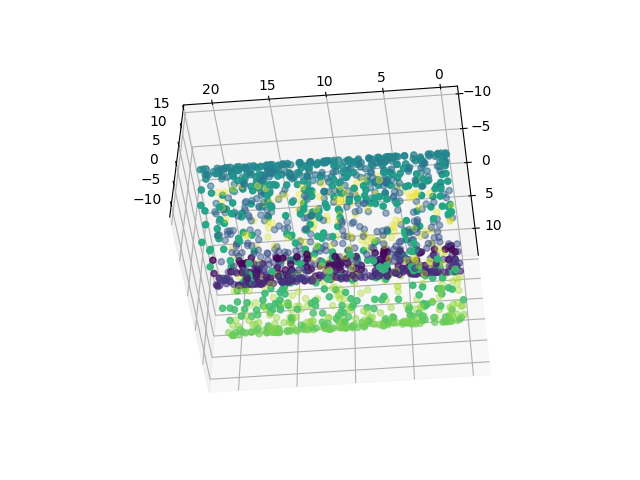

In [8]:
# plot original dataset
from mpl_toolkits.mplot3d import Axes3D
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.scatter(swiss_data[:,0],swiss_data[:,1],swiss_data[:,2],c=colors)

<IPython.core.display.Javascript object>


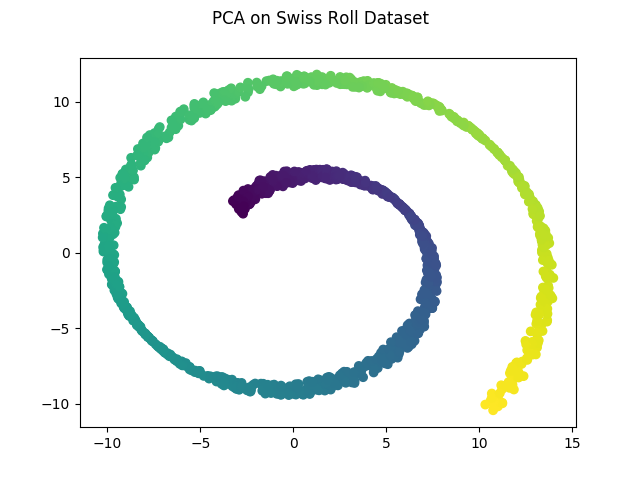

In [9]:
# PCA on swiss roll
pca_transformed_s = get_transformed_pca(swiss_data,2)

fig3,ax3 = plt.subplots()
ax3.scatter(pca_transformed_s[:,0],pca_transformed_s[:,1],c = colors)
fig3.suptitle("PCA on Swiss Roll Dataset")

In [ ]:
# get transformed data from t-sne for swiss
tsne_transformed_s = get_transformed_tsne(swiss_data,2)

fig4,ax4 = plt.subplots()
print(colors)
ax4.scatter(tsne_transformed_s[:,0],tsne_transformed_s[:,1],c = colors)
fig4.suptitle("t-SNE on Swiss Roll Dataset")